In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
train = pd.read_csv('LogisticChurnData.csv')

In [3]:
train.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


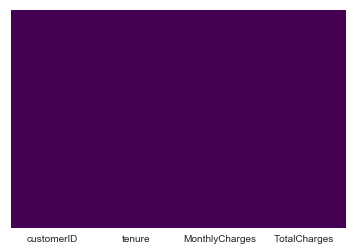

In [86]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

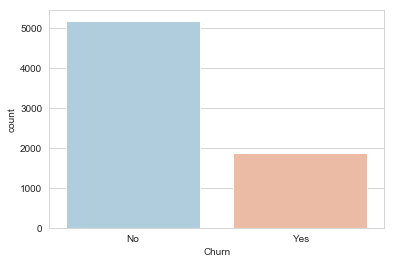

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',data=train,palette='RdBu_r')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 495.3+ KB


In [7]:
train.describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


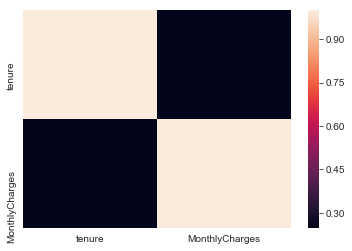

In [8]:
sns.heatmap(train.corr())

In [44]:
train.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [31]:
train.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
# Create dummy variables for 2 columns
df_PaymentMethod = pd.get_dummies(train['PaymentMethod'],drop_first=True)
df_Churn = pd.get_dummies(train['Churn'],drop_first=True)
df_PaperlessBilling= pd.get_dummies(train['PaperlessBilling'],drop_first=True)
df_Contract= pd.get_dummies(train['Contract'],drop_first=True)
df_PhoneService= pd.get_dummies(train['PhoneService'],drop_first=True)
#Concat new columns to original dataframe 
df_concat = pd.concat([train, df_PaymentMethod, df_Churn,df_PhoneService,df_Contract,df_PaperlessBilling], axis=1)
print (df_concat.head())

   customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  \
0           Electronic check           29.85        29.85    No   
1               Mailed check           56.95       1889.5    No   
2               Mailed check           53.85       108.15   Yes   
3  Bank transfer (automatic)           42.30      1840.75    No   
4           Electronic check           70.70       151.65   Yes   

   Credit card (automatic)  Electronic check  Mailed check  Yes  Yes  \
0                        0                 1             0    0    0   
1                        0

In [37]:
df_concat.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Credit card (automatic),Electronic check,Mailed check,Yes,Yes,One year,Two year,Yes
0,7590-VHVEG,1,29.85,29.85,0,1,0,0,0,0,0,1
1,5575-GNVDE,34,56.95,1889.5,0,0,1,0,1,1,0,0
2,3668-QPYBK,2,53.85,108.15,0,0,1,1,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,0,0,0,0,1,0,0
4,9237-HQITU,2,70.70,151.65,0,1,0,1,1,0,0,1


In [42]:
train.head()

,customerID,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,1,29.85,29.85
1,5575-GNVDE,34,56.95,1889.5
2,3668-QPYBK,2,53.85,108.15
3,7795-CFOCW,45,42.30,1840.75
4,9237-HQITU,2,70.70,151.65


In [59]:
df_concat.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Credit card (automatic),Electronic check,Mailed check,Churn,PaperlessBilling,One year,Two year,PhoneService
0,7590-VHVEG,1,29.85,29.85,0,1,0,0,0,0,0,1
1,5575-GNVDE,34,56.95,1889.5,0,0,1,0,1,1,0,0
2,3668-QPYBK,2,53.85,108.15,0,0,1,1,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,0,0,0,0,1,0,0
4,9237-HQITU,2,70.70,151.65,0,1,0,1,1,0,0,1


In [65]:
df_concat.columns.values[7] = "Churn"
df_concat.columns.values[8] = "PaperlessBilling"
df_concat.columns.values[11] = "PhoneService"
df_concat.drop(['Credit card (automatic)'],axis=1)

,customerID,tenure,MonthlyCharges,TotalCharges,Electronic check,Mailed check,Churn,PaperlessBilling,One year,Two year,PhoneService
0,7590-VHVEG,1,29.85,29.85,1,0,0,0,0,0,1
1,5575-GNVDE,34,56.95,1889.5,0,1,0,1,1,0,0
2,3668-QPYBK,2,53.85,108.15,0,1,1,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,0,0,0,0,1,0,0
4,9237-HQITU,2,70.70,151.65,1,0,1,1,0,0,1
5,9305-CDSKC,8,99.65,820.5,1,0,1,1,0,0,1
6,1452-KIOVK,22,89.10,1949.4,0,0,0,1,0,0,1
7,6713-OKOMC,10,29.75,301.9,0,1,0,0,0,0,0
8,7892-POOKP,28,104.80,3046.05,1,0,1,1,0,0,1
9,6388-TABGU,62,56.15,3487.95,0,0,0,1,1,0,0


In [66]:
X = df_concat[['tenure', 'PhoneService', 'PaperlessBilling',
                 'MonthlyCharges', 'TotalCharges','Electronic check',
               'Mailed check','One year','Two year']]
y = df_concat['Churn']

In [85]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Electronic check,Mailed check,One year,Two year
0,1,1,0,29.85,29.85,1,0,0,0
1,34,0,1,56.95,1889.5,0,1,1,0
2,2,1,1,53.85,108.15,0,1,0,0
3,45,0,0,42.30,1840.75,0,0,1,0
4,2,1,1,70.70,151.65,1,0,0,0


In [68]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: uint8

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [78]:
from sklearn.linear_model import LogisticRegression

In [83]:
model = LogisticRegression()
model.fit(X_train,y_train)
model = LogisticRegression(solver='lbfgs')
model = LogisticRegression(solver='liblinear')
try:
    float(element)
except ValueError:
    pass

ValueError: could not convert string to float: 

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))